Fitting GARCH model for NN Group...
Fitting GARCH model for ING Group...
Fitting GARCH model for ABN AMRO...
Fitting GARCH model for KBC Group...
Fitting GARCH model for Deutsche Bank...


<Figure size 1200x600 with 0 Axes>

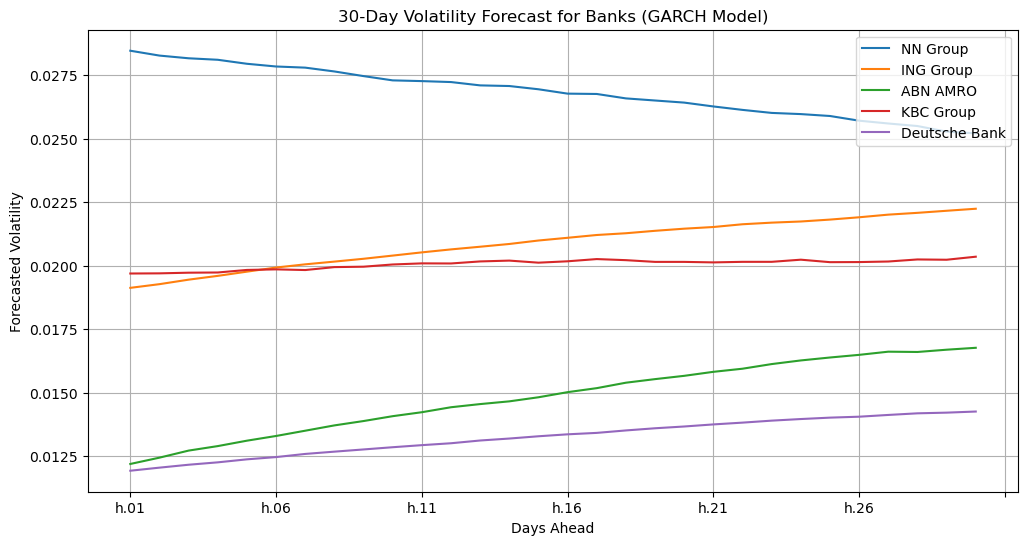

GARCH Volatility Forecast (Next 30 Days):
      NN Group  ING Group  ABN AMRO  KBC Group  Deutsche Bank
h.01  0.028469   0.019128  0.012191   0.019693       0.011925
h.02  0.028277   0.019273  0.012440   0.019699       0.012046
h.03  0.028171   0.019451  0.012718   0.019725       0.012161
h.04  0.028112   0.019600  0.012895   0.019733       0.012255
h.05  0.027954   0.019766  0.013108   0.019834       0.012374
h.06  0.027847   0.019928  0.013294   0.019856       0.012463
h.07  0.027802   0.020054  0.013501   0.019830       0.012586
h.08  0.027652   0.020162  0.013710   0.019945       0.012676
h.09  0.027469   0.020273  0.013882   0.019961       0.012763
h.10  0.027300   0.020399  0.014073   0.020049       0.012851
h.11  0.027272   0.020526  0.014229   0.020092       0.012932
h.12  0.027234   0.020643  0.014425   0.020088       0.013007
h.13  0.027103   0.020748  0.014550   0.020169       0.013115
h.14  0.027078   0.020856  0.014657   0.020201       0.013193
h.15  0.026950   0.020993  0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Load cleaned bank stock data
file_path = "C:/Users/manos/OneDrive/Desktop/GitHub/Portfolio1/Project_2_Netherlands_Banking_Risk/cleaned_banks_stock_data.csv"
bank_data = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Compute log returns
returns = np.log(bank_data.pct_change() + 1).dropna()

# Define forecast horizon
forecast_days = 30

# Dictionary to store forecasts
garch_forecasts = {}

# Fit GARCH model and forecast volatility for each bank
for bank in returns.columns:
    print(f"Fitting GARCH model for {bank}...")
    
    # Fit GARCH(1,1) model
    model = arch_model(returns[bank] * 100, vol="Garch", p=1, q=1, dist="normal")
    result = model.fit(disp="off")

    # Forecast volatility
    forecast = result.forecast(horizon=forecast_days, method='simulation')

    # Save conditional volatility forecast
    garch_forecasts[bank] = np.sqrt(forecast.variance.iloc[-1]) / 100  # Convert to percentage

# Convert forecasts to DataFrame
garch_forecasts_df = pd.DataFrame(garch_forecasts)

# Plot GARCH Volatility Forecast
plt.figure(figsize=(12,6))
garch_forecasts_df.plot(figsize=(12,6))
plt.title("30-Day Volatility Forecast for Banks (GARCH Model)")
plt.ylabel("Forecasted Volatility")
plt.xlabel("Days Ahead")
plt.legend()
plt.grid()
plt.show()

# Display forecasted volatility values
print("GARCH Volatility Forecast (Next 30 Days):")
print(garch_forecasts_df)
